# Investigating the Best Markets to Advertise In For E-Learning Products

In this project, we're assuming we work for an e-learning company that offers courses on programming, mainly on web and mobile development. We want to promote our product by investing money in advertisements. Our goal is to find the two best markets to advertise in (e.g. web development or data science).

## Understanding the Data

For the sake of saving money and time, we will use [survey data](https://github.com/freeCodeCamp/2017-new-coder-survey) created by [freeCodeCamp](https://www.freecodecamp.org/) in 2017. As they run a popular Medium publication with 400,000+ followers, freeCodeCamp attracted a number of new coders with varying interests, perfect for our analysis.

In [19]:
# Reading in the data
import pandas as pd
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', 
                     low_memory = False) # low_memory = False to silence dtype warnings

# Exploring the survey dataset
print(survey.shape)
pd.set_option('display.max_columns', None) # Avoiding truncated output
survey.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity
To hone in on our analysis, we'd like to know specifically:
- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money are these new coders willing to invest in learning?

Let's first determine if this dataset is representative of the population we'd like to learn more about. We'll peer into the `JobRoleInterest` column to gain insight on what new coders want to be, by creating a frequency distribution table.

In [7]:
# Creating a frequency distribution table for the 'JobRoleInterest' column
survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                  

At a glance, we can tell:
- Many people are interested in web development (full-stack, front-end, and back-end web development)
- Some people are interested in data science.
- Some people are also interested in mobile development.

However, these numbers may be misleading as it appears there are many responses that have several job role interests mentioned. To get more accurate image of what people are interested in, we'll separate each job role option for each participant and count how many options each participant is considering in a frequency table.

In [9]:
# Splitting each role in the 'JobRoleInterests' column
interests = survey['JobRoleInterest'].dropna()
splitted_interests = interests.str.split(',')

# Creating a frequency table for the number of options
n_options = splitted_interests.apply(lambda x: len(x))
n_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It turns out that only about 31.7% of the participants have one specific job role they are interested in, while the majority of participants have mixed interests. Given that we offer courses in multiple fields, this note is beneficial to us as our advertisements may reach more people than the data initially showed.

Because our company's main courses focus on web and mobile development, let's find out how many respondents are interested in those options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


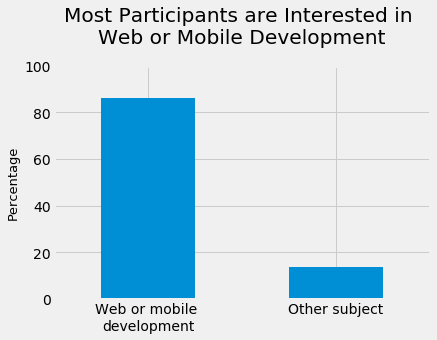

In [18]:
# Creating a frequency table
web_mobile = interests.str.contains('Web Developer|Mobile Developer')
freq_table = web_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graphing the frequency table
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development', y = 1.07) # y moves the title upward
plt.ylabel('Percentage', fontsize = 13)
plt.xticks([0, 1], ['Web or mobile \ndevelopment', 'Other subject'], rotation = 0)
plt.ylim([0, 100]) 
plt.show()

About 86.2% of respondents indicated interest in web or mobile development. This is a good indication for us to mainly advertise about our web and mobile development courses.

Now we can return to our earlier questions:
- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money are these new coders willing to invest in learning?

## New Coders - Locations and Densities
We'll start with finding out where these new coders are located and how populated these areas are. The data set contains information on the location of each participant by country, so we'll think about our goal as the best countries to advertise in.

The `CountryLive` variable describes what country each participant lives in (which may differ from the information of `CountryCitizen`, containing a respondent's origin country). We'll begin our analysis there. 

In [20]:
# Filtering out the participants who did not answer what role they'd be interested in
survey_filtered = survey[survey['JobRoleInterest'].notnull()].copy()

# Creating frequency tables with both absolute and relative frequencies
absolute_f = survey_filtered['CountryLive'].value_counts()
relative_f = survey_filtered['CountryLive'].value_counts(normalize = True) * 100

# Displaying the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute Frequency': absolute_f, 
                     'Percentage': relative_f}
            )

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Anguilla,1,0.014624
Somalia,1,0.014624
Gambia,1,0.014624
Samoa,1,0.014624


The most promising country to advertise in, appears to be the US, with about 45.7% of respondents being located there. India follows as the second most densely populated area of respondents, but it's only 7.7%, with the UK being the next most densely populated area of respondents at 4.6%. 

We need to continue our analysis however, as there's a possibility that most respondents in the US are only willing to learn for free. 

## Spending Money for Learning

Our company will benefit from an analysis on how much new coders are willing to spend on learning. The `MoneyForLearning` column describes the amount of money (in US dollars) a participant has spent from the time they began learning to the time of the survey. Since our company sells subscriptions at a price of \$59 per month, we need to find how much each respondent spent per month on their learning. 

For the sake of our analysis, we will narrow our investigation to the top four countries from our previous analysis (US, India, UK, and Canada). The reasons for this include:
- These countries had the highest absolute frequencies in our sample, which gives us a decent amount of data for each.
- Our course are written in English. These countries have English as an official language, giving our company a better chance to target the right people with our ads as the people are more likely to know English.

In [22]:
# Adjusting the 0's to 1's to avoid dividing by 0
survey_filtered['MonthsProgramming'].replace(0, 1, inplace = True)

# Creating a new column to describe how much a respondent spent per month on learning
survey_filtered['money_per_month'] = survey_filtered['MoneyForLearning'] / survey_filtered['MonthsProgramming']
survey_filtered['money_per_month'].isnull().sum()

675

Let's remove the null rows in the `money_per_month` column.

In [23]:
# Removing the null rows in the 'money_per_month' column
survey_filtered = survey_filtered[survey_filtered['money_per_month'].notnull()]

We want to group this data by country. We'll first have to remove any rows with null values in the `CountryLive` column before grouping, then check if we still have enough data to proceed with our analysis.

In [25]:
# Removing the null rows in the 'CountryLive' column
survey_filtered = survey_filtered[survey_filtered['CountryLive'].notnull()]

# Creating a frequency table to check if we still have enough data
survey_filtered['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

It seems we have enough, so we'll continue by computing the average value spent by a respondent per month in each country.

In [26]:
# Calculating the mean sum of money spent by respondents each month, by country
countries_mean = survey_filtered.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 
                                   'India', 'United Kingdom', 
                                   'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

Considering some socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies), we'd expect people in the UK and Canada to spend more on learning than people in India. 

It might be that we don't have enough representative data for the UK and Canada, or we may have some outliers (perhaps originating from incorrectly inputed survey answers). The results could also just be correct. 

## Handling Outliers

We'll use box plots to visualize the distribution of the `money_per_month` column for each country.

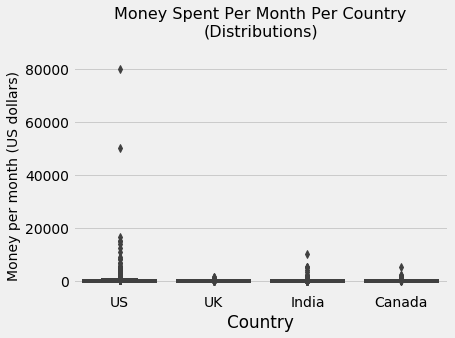

In [38]:
# Keeping only the countries of interest
top_4 = survey_filtered[survey_filtered['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Creating the box plots to visualize the distributions
import seaborn as sns
sns.boxplot(data = top_4, x = 'CountryLive', y = 'money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16, y = 1.07)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # Avoiding tick labels overlapping
plt.show()

It's difficult to discern what's wrong with the data for the UK, India, and Canada, but we can see two persons spending `$50,000+` each month for learning. It's not impossible to invest this much in learning, but it's highly unlikely so we'll only keep the values that are below `$20,000` per month.

In [39]:
# Filtering the values that are above $20,000 per month
survey_filtered = survey_filtered[survey_filtered['money_per_month'] < 20000]

Now let's recalculate the mean values and recreate the box plots again.

In [40]:
# Recalculating the mean sum of money spent by respondents each month
countries_mean = survey_filtered.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America', 
                                   'India', 'United Kingdom', 
                                   'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

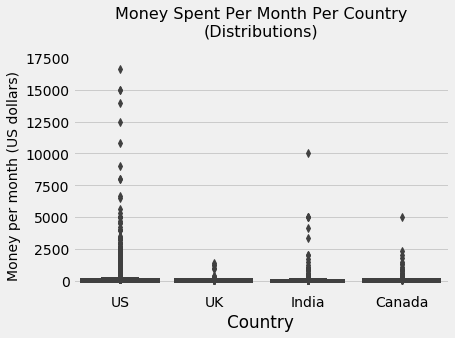

In [41]:
# Keeping only the countries of interest
top_4 = survey_filtered[survey_filtered['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Recreating the box plots to visualize the distributions
import seaborn as sns
sns.boxplot(data = top_4, x = 'CountryLive', y = 'money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16, y = 1.07)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # Avoiding tick labels overlapping
plt.show()

We can see a few extreme outliers for india (values above `$2,500` a month), but it's not clear whether this is good or bad data. It's possible these respondents went to several bootcamps (which tend to be very expensive). We'll inspect these outliers in more depth.

In [43]:
# Inspecting the extreme outliers for India
india_outliers = top_4[
    (top_4['CountryLive'] == 'India') &
    (top_4['money_per_month'] >= 2500)
]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

It seems none of these participants attended a bootcamp. The actual question in the survey for this column was, "*Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?*", so they might have mistakenly included university tuition. We'll remove these rows to remain on the safe side. 

In [44]:
# Removing the outliers for India
top_4 = top_4.drop(india_outliers.index) # Using the row labels to remove

We also see a number of outliers for the US (values over `$6,000` a month). Let's inspect these outliers to see if there's anything relevant.

In [45]:
# Inspecting the extreme outliers for the US
us_outliers = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['money_per_month'] >= 6000)
]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Out of these 11 respondents, six of them attended a bootcamp. As it's unclear how to justify how the other five could have spent `$6,000+` each month on learning, we'll remove them from the data. 

Additionally, eight respondents had been programming for no more than three months by the time they completed the survey. It's likely they paid a large amount of money for a bootcamp that was going to last several months, so the amount of money spent is unrealistic to what they would regularly spend per month on learning. We'll remove them from the data as well.

In [46]:
# Removing the respondents 
# - in the US 
# - who spent over 6000 per month and 
# - didnt attend a bootcamp
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['money_per_month'] >= 6000) &
    (top_4['AttendedBootcamp'] == 0) 
]

top_4 = top_4.drop(no_bootcamp.index) # Using the row labels to remove

# Removing the respondents
# - in the US 
# - who spent over 6000 per month and 
# - have been programming for less than 3 months
under_3_months = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['money_per_month'] >= 6000) &
    (top_4['MonthsProgramming'] <= 3)
]

top_4 = top_4.drop(under_3_months.index) # Using the row labels to remove

Returning to box plot above, we see there's an outlier for Canada that spent `$5,000` on learning per month. Let's look at this respondent in more detail.

In [47]:
# Inspecting the extreme outliers for Canada
canada_outliers = top_4[
    (top_4['CountryLive'] == 'Canada') &
    (top_4['money_per_month'] >= 5000)
]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We see a similar situation to some of the US respondents; this respondent has been programming for about two months when he completed the survey. He most likely spent a large amount of money at the beginning to enroll in a bootcamp, and probably did not spend anything for the next couple of months after the survey. We'll remove this outlier.

In [48]:
top_4 = top_4.drop(canada_outliers.index) # Using the row labels to remove

Let's recalculate the mean values and recreate the box plot.

In [49]:
# Recalculating the mean sum of money spent by respondents each month
top_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: money_per_month, dtype: float64

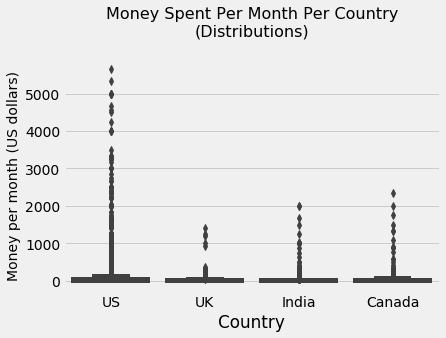

In [50]:
# Recreating the box plots to visualize the distributions
import seaborn as sns
sns.boxplot(data = top_4, x = 'CountryLive', y = 'money_per_month')
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16, y = 1.07)
plt.xlabel('Country')
plt.ylabel('Money per month (US dollars)', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # Avoiding tick labels overlapping
plt.show()

## Choosing the Two Best Markets

It's clear we should advertise in the US as each new coder is willing to spend about `$143` on learning, per month on average.

Our company sells subscriptions for `$59` per month, eliminating the UK as a potential market. Between India and Canada, new coders are willing to spend more in Canada on learning per month. However, let's reexamine Canada and India before deciding the second market. We need to take into account that:
- India is willing to spend more than our subscription price since they spend about `$66` on learning, per month on average.
- We have almost twice as more potential customers in India than in Canada:

In [52]:
# Creating a frequency table for the 'CountryLive' column
top_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Given India has more potential customers than Canada, India may be a more promising candidate as a market for our company. Let's try making a "score" for each of these countries to see how we might want to allocate our budget. We'll accomplish this by: 
- Multiplying the average money each country spends on learning per month, by the relative frequencies of respondents in each country.
- Dividing the result by the sum of the scores to get a sum score of 100. 

In [58]:
top_3 = top_4[top_4['CountryLive'].str.contains(
    'United States of America|India|Canada')]
average_spent = top_3.groupby('CountryLive').mean()['money_per_month']
relative_f = top_3['CountryLive'].value_counts(normalize = True)
score = average_spent * relative_f
score = score / (score.sum()) * 100
pd.DataFrame(data = {'Average Money Spent': average_spent,
                    'Percentage': relative_f,
                    'Score': score}
            )

,Average Money Spent,Percentage,Score
Canada,93.065400,0.066095,4.744125
India,65.758763,0.126383,6.409730
United States of America,142.654608,0.807522,88.846145


Based on our analysis, to maximize our profit we should split the advertisement budget by allocating:
- about 88.8% of it to US advertisements
- about 6.4% of it to India advertisements
- the remainder (about 4.8%) of it to Canada advertisements

Of course, the score values average money spent and location density equally. It might not be best to weigh both the same and it would probably be best to send our analysis back to the marketing team and let them decide how to allocate the budget based on their domain knowledge. They might conduct additional surveys in India and Canada and follow up with us for further analysis.

## Conclusion

In this project, we analyzed survey data from new coders to determine the best two markets to advertise our company's product in. We concluded that the US was a definite market to advertise in.

The second best market was not very clear, between India and Canada. We chose to send the results to the marketing team so they can use their domain knowledge to make the best decision.